<a href="https://colab.research.google.com/github/jlule/Machine_learning_Module_3/blob/main/house_price_predictions_module_3_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [2]:
housing.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

# Data Exploration

In [4]:
# Grade is relative/subjective to each person.
housing['grade'].groupby(housing['price']).value_counts()

price      grade
75000.0    3        1
78000.0    5        1
80000.0    4        1
81000.0    5        1
82000.0    6        1
                   ..
5350000.0  12       1
5570000.0  13       1
6885000.0  13       1
7062500.0  11       1
7700000.0  13       1
Name: grade, Length: 6374, dtype: int64

In [5]:
housing['price'].groupby(housing['bedrooms']).value_counts(normalize=True)

bedrooms  price    
0         139950.0     0.090909
          142000.0     0.090909
          228000.0     0.090909
          235000.0     0.090909
          240000.0     0.090909
                         ...   
10        650000.0     0.333333
          660000.0     0.333333
          1148000.0    0.333333
11        520000.0     1.000000
33        640000.0     1.000000
Name: price, Length: 6497, dtype: float64

In [6]:
# Seems to have an outlier or two under this field.
housing['bedrooms'].value_counts()


3     9101
4     6354
2     2567
5     1478
6      251
1      179
7       36
8       12
0       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
ten = housing[housing['bedrooms'] == 11]

ten

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
743,1773100755,20140821T000000,11,3.0,3000,4960,2.0,0,0,3,...,2400,600,1918,1999,98106,47.556,-122.363,1420,4960,520000.0


In [8]:
thirty = housing[housing['bedrooms'] == 33]

thirty

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6984,2402100895,20140625T000000,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000.0


In [9]:
housing = housing[housing['bedrooms'] < 33]

housing['bedrooms'].value_counts()

3     9101
4     6354
2     2567
5     1478
6      251
1      179
7       36
8       12
0       11
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [10]:
housing['bathrooms'].groupby(housing['price']).value_counts()

price      bathrooms
75000.0    0.00         1
78000.0    1.00         1
80000.0    0.75         1
81000.0    1.00         1
82000.0    1.00         1
                       ..
5350000.0  5.00         1
5570000.0  5.75         1
6885000.0  7.75         1
7062500.0  4.50         1
7700000.0  8.00         1
Name: bathrooms, Length: 8583, dtype: int64

In [11]:
housing['sqft_living'].groupby(housing['price']).value_counts()

price      sqft_living
75000.0    670            1
78000.0    780            1
80000.0    430            1
81000.0    730            1
82000.0    860            1
                         ..
5350000.0  8000           1
5570000.0  9200           1
6885000.0  9890           1
7062500.0  10040          1
7700000.0  12050          1
Name: sqft_living, Length: 18248, dtype: int64

In [12]:
# No real correlation to Price. Can get rid of
housing['sqft_lot'].groupby(housing['price']).value_counts()

price      sqft_lot
75000.0    43377       1
78000.0    16344       1
80000.0    5050        1
81000.0    9975        1
82000.0    10426       1
                      ..
5350000.0  23985       1
5570000.0  35069       1
6885000.0  31374       1
7062500.0  37325       1
7700000.0  27600       1
Name: sqft_lot, Length: 19566, dtype: int64

In [13]:
housing['yr_built'].groupby(housing['price']).value_counts()

price      yr_built
75000.0    1966        1
78000.0    1942        1
80000.0    1912        1
81000.0    1943        1
82000.0    1954        1
                      ..
5350000.0  2009        1
5570000.0  2001        1
6885000.0  2001        1
7062500.0  1940        1
7700000.0  1910        1
Name: yr_built, Length: 16352, dtype: int64

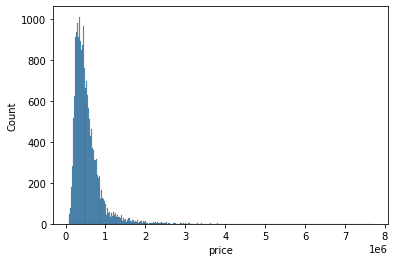

In [14]:
# Found that outside of 1 to 1.5 million, there are a lot of "outliers". Possibly trim data down to 1 or 1.5 million by price?
sns.histplot(
    x = housing['price']
)

In [15]:
# housing = housing[housing['price'] < 1000000]

In [16]:
# Data sorted by date. Found that datetime range for these housing selling is from May 2014 to May 2015
housing['datetime'] = pd.to_datetime(housing['date'])
housing.sort_values(by='datetime')

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,datetime
11735,3221059036,20140502T000000,4,2.50,3630,42884,1.5,0,0,3,...,1330,1979,0,98092,47.2617,-122.190,2830,80148,400000.0,2014-05-02
17660,472000620,20140502T000000,3,2.50,2600,4750,1.0,0,0,4,...,900,1951,0,98117,47.6833,-122.400,2380,4750,790000.0,2014-05-02
6133,2207200675,20140502T000000,3,1.50,1570,6700,1.0,0,0,4,...,0,1956,0,98007,47.6022,-122.134,1570,7300,419000.0,2014-05-02
8539,7197300105,20140502T000000,4,2.50,1940,10500,1.0,0,0,4,...,800,1976,0,98052,47.6830,-122.114,2200,10500,550000.0,2014-05-02
5670,4040800810,20140502T000000,3,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,98008,47.6188,-122.114,2070,8250,420000.0,2014-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,4166600610,20150514T000000,3,2.00,1410,44866,1.0,0,0,4,...,0,1985,0,98023,47.3273,-122.370,2950,29152,335000.0,2015-05-14
2330,8562790720,20150514T000000,4,3.50,2630,3757,2.0,0,0,3,...,430,2008,0,98027,47.5322,-122.075,2620,2699,749950.0,2015-05-14
16657,7923600250,20150515T000000,5,2.00,1870,7344,1.5,0,0,3,...,0,1960,0,98007,47.5951,-122.144,1870,7650,450000.0,2015-05-15
4281,5101400871,20150524T000000,2,1.75,1390,6670,1.0,0,0,3,...,670,1941,0,98115,47.6914,-122.308,920,6380,445500.0,2015-05-24


[Text(0, 0.5, 'Total Houses Sold'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Houses Sold Through the Years')]

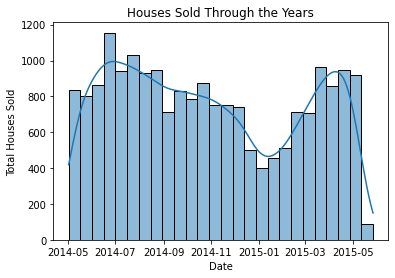

In [17]:
sns.histplot(data=housing, x="datetime", kde=True).set(title='Houses Sold Through the Years', xlabel='Date', ylabel='Total Houses Sold')

# Model

In [18]:
# Import the libraries we need 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [19]:
center_lat = 47.617004
center_long = -122.343506

housing["distance"] = ((center_lat - housing["lat"])**2 + (center_long - housing["long"])**2)**.05
housing["distance"].head()

0    0.906564
1    0.891147
2    0.764832
3    0.887130
4    0.782450
Name: distance, dtype: float64

In [20]:
# Bedrooms, Bathrooms, sqft_living, sqft_lot, condition, grade, yr_built, yr_renovated, zipcode, 
features = ['distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'id', 'yr_renovated']
X = housing[features]

y = housing['price']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=20)

In [21]:
model = XGBRegressor(n_estimators=400,learning_rate=0.03, max_depth=7, min_child_weight=4, nthread=4, objective='reg:linear', silent=1, subsample=0.7)
model.fit(X_train, y_train)

XGBRegressor(learning_rate=0.03, max_depth=7, min_child_weight=4,
             n_estimators=400, nthread=4, silent=1, subsample=0.7)

In [22]:
predictions = model.predict(X_test)
predictions

array([ 351803.47, 1368013.1 ,  501034.  , ...,  393107.44,  330909.3 ,
        367272.7 ], dtype=float32)

Error Counts

In [23]:
# RMSE Value (squared set to False)
from sklearn.metrics import mean_squared_error

result = mean_squared_error(y_test, predictions, squared=False)
result


133371.46971162639

In [24]:
# R2 Value
from sklearn.metrics import r2_score

result = r2_score(y_test, predictions)

print(result)

0.8668581999861952


Model Feature Importance Chart

In [25]:
def buildTrainTestPrintModel(X, y):
  X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=20)
  model = XGBRegressor(n_estimators=400,learning_rate=0.03, max_depth=7, min_child_weight=4, nthread=4, objective='reg:linear', silent=1, subsample=0.7)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  result = r2_score(y_test, predictions)

  within5 = (predictions / y_test - 1) < .05
  print(within5.value_counts())


In [26]:
housing_without0bedrooms = housing[housing['bedrooms'] > 0]
housing_without0bedrooms['bedrooms'].value_counts()

3     9101
4     6354
2     2567
5     1478
6      251
1      179
7       36
8       12
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [27]:
features = ['distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'id', 'yr_renovated']
X = housing_without0bedrooms[features]
y = housing_without0bedrooms['price']

buildTrainTestPrintModel(X, y)

True     9431
False    5560
Name: price, dtype: int64


In [28]:
housing_without0bedrooms = housing[(housing['bedrooms'] > 0) & (housing['bathrooms'] > 0)]
housing_without0bedrooms['bedrooms'].value_counts()

3     9101
4     6354
2     2567
5     1478
6      251
1      176
7       36
8       12
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [29]:
features = ['distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'id', 'yr_renovated']
X = housing_without0bedrooms[features]
y = housing_without0bedrooms['price']

buildTrainTestPrintModel(X, y)

True     9403
False    5585
Name: price, dtype: int64


In [30]:
housing['coordinates'] = housing['lat'].astype(str) + ", " + housing['long'].astype(str)
housing['apartments'] = housing['coordinates'].duplicated()
housing['apartments'].value_counts()


False    19321
True       678
Name: apartments, dtype: int64

In [31]:
features = ['apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'id', 'yr_renovated']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9425
False    5574
Name: price, dtype: int64


In [32]:
housing['lat'].value_counts()

47.6624    17
47.5491    17
47.6711    16
47.6846    15
47.5322    15
           ..
47.2804     1
47.4677     1
47.2058     1
47.3057     1
47.2781     1
Name: lat, Length: 4973, dtype: int64

In [33]:
housing['long'].value_counts()

-122.290    111
-122.362     99
-122.372     93
-122.300     93
-122.288     92
           ... 
-121.947      1
-122.440      1
-122.499      1
-121.788      1
-121.731      1
Name: long, Length: 742, dtype: int64

In [34]:
housing['date'] = housing['date'].str.replace("T","0").astype(int)
housing['date']

0        201411040000000
1        201501150000000
2        201410140000000
3        201412080000000
4        201408150000000
              ...       
19995    201411130000000
19996    201411110000000
19997    201409300000000
19998    201406200000000
19999    201503250000000
Name: date, Length: 19999, dtype: int64

In [35]:
features = ['date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'id', 'yr_renovated']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9527
False    5472
Name: price, dtype: int64


In [36]:
features = ['date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'yr_renovated']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9535
False    5464
Name: price, dtype: int64


In [37]:
features = ['date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9497
False    5502
Name: price, dtype: int64


In [38]:
features = ['grade', 'date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'sqft_living', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9518
False    5481
Name: price, dtype: int64


In [39]:
features = ['date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'sqft_living', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated', 'grade']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9518
False    5481
Name: price, dtype: int64


In [40]:
features = ['sqft_living', 'date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated', 'grade']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9544
False    5455
Name: price, dtype: int64


In [41]:
features = ['sqft_living', 'date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated', 'grade']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9544
False    5455
Name: price, dtype: int64


In [42]:
housing = housing[housing['sqft_lot'] < 600000]
features = ['date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9518
False    5473
Name: price, dtype: int64


In [43]:
housing = housing[housing['sqft_living'] < 11000]
features = ['date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9355
False    5634
Name: price, dtype: int64


In [44]:
housing = housing[housing['bathrooms'] < 7]
features = ['date', 'apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated']
X = housing[features]
y = housing['price']

buildTrainTestPrintModel(X, y)

True     9592
False    5396
Name: price, dtype: int64


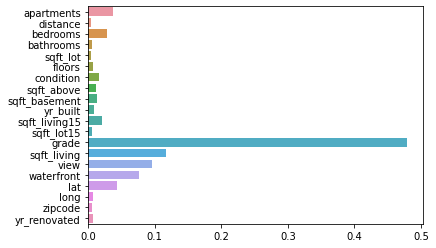

In [45]:
features = ['apartments', 'distance', 'bedrooms','bathrooms', 'sqft_lot', 'floors','condition','sqft_above','sqft_basement','yr_built','sqft_living15', 'sqft_lot15', 'grade', 'sqft_living', 'view', 'waterfront','lat','long', 'zipcode', 'yr_renovated']

sns.barplot(
    x= model.feature_importances_,
    y= features
)

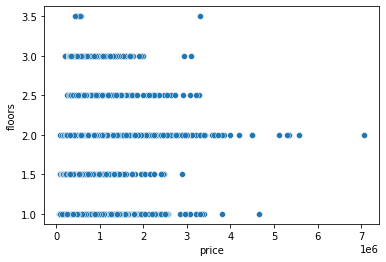

In [46]:
sns.scatterplot(
    x= housing['price'],
    y= housing['floors']
)

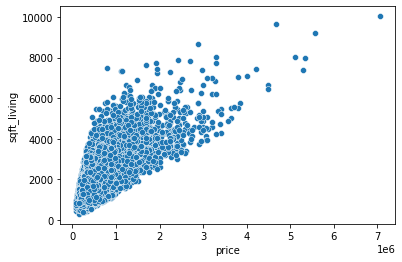

In [47]:
sns.scatterplot(
    x= housing['price'],
    y= housing['sqft_living']
)

Text(0, 0.5, 'Lot Square Feet')

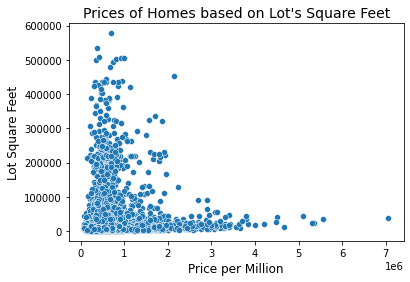

In [48]:
ax = sns.scatterplot(
    x= housing['price'],
    y= housing['sqft_lot']
)

ax.axes.set_title('Prices of Homes based on Lot\'s Square Feet', fontsize=14)
ax.axes.set_xlabel('Price per Million', fontsize=12)
ax.axes.set_ylabel('Lot Square Feet', fontsize=12)

GRID SEARCH

In [49]:
housing['grade'].value_counts(normalize=True)

7     0.416633
8     0.279974
9     0.121347
6     0.094075
10    0.052692
11    0.018215
5     0.010859
12    0.004103
4     0.001401
13    0.000500
3     0.000150
1     0.000050
Name: grade, dtype: float64

In [50]:
grade_homes = housing[housing['grade'] == 7]
grade_homes['price'].value_counts()

350000.0    92
425000.0    86
325000.0    85
400000.0    80
450000.0    79
            ..
671500.0     1
369300.0     1
267345.0     1
239999.0     1
139950.0     1
Name: price, Length: 1819, dtype: int64

Text(0, 0.5, 'Percent (%)')

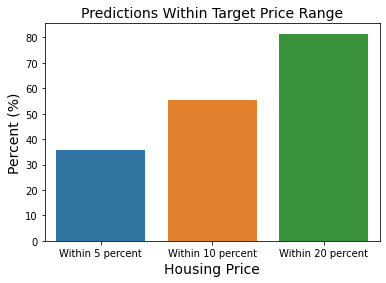

In [51]:
within = {
    'Within 5 percent': 35.802469, 
    'Within 10 percent': 55.555556,
    'Within 20 percent': 81.481481
    }

keys = list(within.keys())

vals = [within[k] for k in keys]

ax = sns.barplot(
    x = keys,
    y = vals
)
ax.set_title('Predictions Within Target Price Range', fontsize=14)
ax.set_xlabel('Housing Price', fontsize=14)
ax.set_ylabel('Percent (%)', fontsize=14)

In [52]:
# mini_holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')
# mini_holdout.drop('date', axis=1, inplace=True)
# mini_holdout["distance"] = ((center_lat - mini_holdout["lat"])**2 + (center_long - mini_holdout["long"])**2)**.05
# mini_predictions = model.predict(mini_holdout)

# df = pd.DataFrame()
# df['predictions'] = mini_predictions

# # # Test it 
# #clf.score(X_test, y_test)
# #df['predictions'].value_counts()
# df['predictions'].value_counts()


# from pathlib import Path  
# filepath = Path('Main/team1-module2-predictions.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# df.to_csv(filepath)
